# Assignment: Network Intrusion Prediction

In this assignment, we are providing you the 'Network Intrusion' dataset. The intruded class is referenced via different features such as Duration, Protocol Type, Service, etc. The task is to predict 'Class' using Supervised Machine Learning alogorithms that has been learned so far. Built the model, submit the jupyter notebook and we will evaluate it.

target encoding: https://towardsdatascience.com/dealing-with-categorical-variables-by-using-target-encoder-a0f1733a4c69

**Independent Variables**

<br>`duration`                     - int   (binning & target encode)
<br>`protocol_type`                - cat   (target encode)
<br>`service`                      - cat   (target encode)
<br>`flag`                         - cat   (target encode)
<br>`src_bytes`                    - int   (binning & target encode)
<br>`dst_bytes`                    - int   (binning & target encode)
<br>`land`                         - int   (nothing)
<br>`wrong_fragment`               - int   (nothing)
<br>`urgent`                       - int   (nothing)
<br>`hot`                          - int   (binning & target encode)
<br>`num_failed_logins`            - int   (nothing)
<br>`logged_in`                    - int   (nothing)
<br>`num_compromised`              - int   (binning & target encode)
<br>`root_shell`                   - int   (nothing)
<br>`su_attempted`                 - int   (nothing)
<br>`num_root`                     - int   (binning & target encode)
<br>`num_file_creations`           - int   (binning & target encode)
<br>`num_shells`                   - int   (binning & target encode)
<br>`num_access_files`             - int   (nothing)
<br>`num_outbound_cmds`            - int   (nothing)
<br>`is_host_login`                - int   (nothing)
<br>`is_guest_login`               - int   (nothing)
<br>`count`                        - int   (binning & target encode)
<br>`srv_count`                    - int   (binning & target encode)
<br>`serror_rate`                  - float (binning & target encode)
<br>`srv_serror_rate`              - float (binning & target encode)
<br>`rerror_rate`                  - float (binning & target encode)
<br>`srv_rerror_rate`              - float (binning & target encode)
<br>`same_srv_rate`                - float (binning & target encode)
<br>`diff_srv_rate`                - float (binning & target encode)
<br>`srv_diff_host_rate`           - float (binning & target encode)
<br>`dst_host_count`               - int   (binning & target encode)
<br>`dst_host_srv_count`           - int   (binning & target encode)
<br>`dst_host_same_srv_rate`       - int   (binning & target encode)
<br>`dst_host_diff_srv_rate`       - int   (binning & target encode)
<br>`dst_host_same_src_port_rate`  - int   (binning & target encode)
<br>`dst_host_srv_diff_host_rate`  - int   (binning & target encode)
<br>`dst_host_serror_rate`         - int   (binning & target encode)
<br>`dst_host_srv_serror_rate`     - int   (binning & target encode)
<br>`dst_host_rerror_rate`         - int   (binning & target encode)
<br>`dst_host_srv_rerror_rate`     - int   (binning & target encode)

**Target Varible**
<br>`class`

## Outline to model and predict 'Network Intrusion'
    
1. [Import Libraries](#1)
    <br>[1.1 Read Dataset and Create Dependent (X) and Independent (y) Features](#1.1)
    <br>[1.2 Split X, y Features into Train and Valid Datasets](#1.2)
2. [Learn Independent Variables](#2)
    <br>[2.1 Group Independent Features based on Types of Variable and 'Encoding' techniques<a id='2.1'></a>](#2.1)
    <br>[2.2 Compute Descriptive Statistics for Numerical Features](#2.2)
3. [Preprocess Input Datasets](#3)
    <br>[3.1 Identify Misssing Values in Dataset](#3.1)
    <br>[3.2 Typecast 'Object' Datatype into 'Categorical' datatype](#3.2)
    <br>[3.3 Encode - Categorical Features](#3.3)
    <br>[3.4 Feature Generation - Binning and Compare the Skewness](#3.4)
    <br>[3.5 Combine Independent Transformed Features and Transform Target ](#3.5)
    <br>[3.6 Feature Importance / Selection](#3.6)
4. [Fit Classification Models using Transformed Datasets](#4)
    <br>[4.1 Import Models and Initialise the classfiers](#4.1)
    <br>[4.2 Evaluate Models](#4.2)
    <br>[4.3 Evaluate Models using 'Importane Features](#4.3)
    <br>[4.4 Evaluate Models using Random Forest using 'Important Features'](#4.4)
5. [5 Predict 'Network Intrusion' Using Unseen 'Test' Dataset](#5)
    <br>[5.1 Predict using RandomForest Classifier](#5.1)
    <br>[5.2 Evaluate Performance Metrics](#5.2)
    <br>[5.3 Create Final Output Dataset by Combiining Prediction](#5.3)

## 1. Import Libraries<a id='1'></a>

In [1]:
# Import necessary Python modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing   import LabelEncoder
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble        import RandomForestClassifier
from sklearn.metrics         import precision_recall_fscore_support, classification_report
from sklearn.preprocessing   import MinMaxScaler, StandardScaler, PowerTransformer, KBinsDiscretizer, LabelEncoder

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

print('Libraries imported')

C:\Users\archi\anaconda3\envs\av\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Libraries imported


### 1.1 Read Dataset and Create Dependent (X) and Independent (y) Features<a id='1.1'></a>

In [2]:
# Function to read file or saved model

def func_read_file_model(path, file_model_name):
    
    #Read CSV file and return Pandas Dataframe
    full_filename = path + file_model_name
    df = pd.read_csv(full_filename)
    
    return df

def func_create_ind_and_dep_features(dataset, target):
    
    #Create and return X and y Features
    X  = dataset.drop(target, axis=1)
    y  = dataset[target]
    
    return X, y

In [3]:
# Read 'network Intrusion' data file and import as Pandas Dataframe
train_df = func_read_file_model('Datasets/', 'Train_data.csv')
X_test   = func_read_file_model('Datasets/', 'Test_data.csv')

X, y           = func_create_ind_and_dep_features(train_df, 'class')

# Save the current state of Datasets
# train_df.to_csv('Datasets/train_df_Section1-1.csv')
# test_df.to_csv('Datasets/test_df_Section1-1.csv')
# X.to_csv('Datasets/X_Section1-1.csv')
# y.to_csv('Datasets/y_Section1-1.csv')

In [4]:
train_df.shape, X_test.shape , X.shape, y.shape

((25192, 42), (22544, 41), (25192, 41), (25192,))

### 1.2 Split X, y Features into Train and Valid Datasets<a id='1.2'></a>

In [5]:
# Split the independent featuers into Train and Valid Datasets.

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

#Reset indices of each datasets
X_train.reset_index(drop=True, inplace=True)
X_valid.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_valid.reset_index(drop=True, inplace=True)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape

((20153, 41), (20153,), (5039, 41), (5039,), (22544, 41))

## 2. Learn Independent Variables<a id='2'></a>

In [6]:
# check out datatypes of Independent Features - X_train

X_train.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [7]:
# check out datatypes of Independent Features - X_valid

X_valid.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [8]:
# check out datatypes of Test Dataset - X_test

X_test.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

### 2.1 Group Independent Features based on Types of Variable and 'Encoding' techniques<a id='2.1'></a>

#### Types of variables

(Ref: https://www.abs.gov.au/statistics/understanding-statistics/statistical-terms-and-concepts/variables)
<br>There are different ways variables can be described according to the ways they can be studied, measured, and presented.
#### Numeric Variables
Numeric variables have values that describe a measurable quantity as a number, like 'how many' or 'how much'. Therefore numeric variables are quantitative variables. Numeric variables may be further described as either continuous or discrete:

**`Continuous`**
<br>A continuous variable is a numeric variable. Observations can take any value between a certain set of real numbers. The value given to an observation for a continuous variable can include values as small as the instrument of measurement allows. Examples of continuous variables include height, time, age, and temperature.

**`Discrete`**
<br>A discrete variable is a numeric variable. Observations can take a value based on a count from a set of distinct whole values. A discrete variable cannot take the value of a fraction between one value and the next closest value. Examples of discrete variables include the number of registered cars, number of business locations, and number of children in a family, all of of which measured as whole units (i.e. 1, 2, 3 cars).
The data collected for a numeric variable are quantitative data.

#### Categorical Variables
<br>Categorical variables have values that describe a 'quality' or 'characteristic' of a data unit, like 'what type' or 'which category'. Categorical variables fall into mutually exclusive (in one category or in another) and exhaustive (include all possible options) categories. Therefore, categorical variables are qualitative variables and tend to be represented by a non-numeric value.

Categorical variables may be further described as ordinal or nominal:
<br>**`Ordinal`**
<br>An ordinal variable is a categorical variable. Observations can take a value that can be logically ordered or ranked. The categories associated with ordinal variables can be ranked higher or lower than another, but do not necessarily establish a numeric difference between each category. Examples of ordinal categorical variables include academic grades (i.e. A, B, C), clothing size (i.e. small, medium, large, extra large) and attitudes (i.e. strongly agree, agree, disagree, strongly disagree).

**`Nominal`**
<br>A nominal variable is a categorical variable. Observations can take a value that is not able to be organised in a logical sequence. Examples of nominal categorical variables include sex, business type, eye colour, religion and brand.

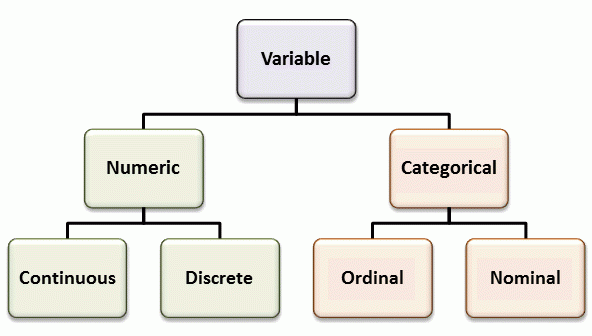

### Transforming a Continuous Variable into Discrete...
(Ref: https://fritz.ai/hands-on-with-feature-engineering-techniques-variable-discretization/)

**`Equal-Frequency Discretization`**
Equal-frequency discretization divides the scope of possible values of the variable into N bins, where each bin holds the same number (or approximately the same number) of observations.

When working with equal-frequency discretization, here are some points to consider:

In this method, the interval boundaries correspond to the quantiles.
- This method improves the value spread.
- Equal-frequency handles outliers.
- This arbitrary binning may disturb the relationship with the target.
- It’s useful when combined with with categorical encodings.

### Data Pre-processing using Scikit-learn
(Ref: https://lopooja2111.medium.com/data-pre-processing-using-scikit-learn-3dc7fb078685)
<br>(Ref: https://www.analyticsvidhya.com/blog/2021/05/complete-guide-on-encode-numerical-features-in-machine-learning/)
<br>Data pre-processing is one technique of data mining using that you can convert your raw data into an understandable format. In his practical, we will take one dataset and performing the following task

- Standardization
- Normalization
- Encoding
- Discretization
- Imputation of missing values.

**[proto_serv_flag_cat_target_encoding]**
<br>(Ref: https://letsdatascience.com/frequency-encoding/)
<br>"Frequency Encoding (Probability Ratio Encoding: Each category is replaced with the 'Probability Ratio' of the target variable."
<br>`protocol_type`                - cat   (Frequency Encoding)
<br>`service`                      - cat   (Frequency Encoding)
<br>`flag`                         - cat   (Frequency Encoding)

**Binning and Target Encoding require**

**[src_dst_int_binning_target_encoding]**
<br>`duration`                     - int   (Equal-Frequency Discretization)
<br>`src_bytes`                    - int   (Equal-Frequency Discretization)
<br>`dst_bytes`                    - int   (Equal-Frequency Discretization)
<br>`hot`                          - int   (Equal-Frequency Discretization)
<br>`num_compromised`              - int   (Equal-Frequency Discretization)
<br>`num_root`                     - int   (Equal-Frequency Discretization)
<br>`num_file_creations`           - int   (Equal-Frequency Discretization)
<br>`count`                        - int   (Equal-Frequency Discretization)
<br>`srv_count`                    - int   (Equal-Frequency Discretization)
<br>`dst_host_count`               - int   (Equal-Frequency Discretization)
<br>`dst_host_srv_count`           - int   (Equal-Frequency Discretization)

**[dst_host_float_binning_target_encoding]**
<br>`dst_host_same_srv_rate`       - float   (Equal-Frequency Discretization)
<br>`dst_host_diff_srv_rate`       - float   (Equal-Frequency Discretization)
<br>`dst_host_same_src_port_rate`  - float   (Equal-Frequency Discretization)
<br>`dst_host_srv_diff_host_rate`  - float   (Equal-Frequency Discretization)
<br>`dst_host_serror_rate`         - float   (Equal-Frequency Discretization)
<br>`dst_host_srv_serror_rate`     - float   (Equal-Frequency Discretization)
<br>`dst_host_rerror_rate`         - float   (Equal-Frequency Discretization)
<br>`dst_host_srv_rerror_rate`     - float   (Equal-Frequency Discretization)

**[srv_rate_float_binning_target_encoding]**
<br>`serror_rate`                  - float (Equal-Frequency Discretization)
<br>`srv_serror_rate`              - float (Equal-Frequency Discretization)
<br>`rerror_rate`                  - float (Equal-Frequency Discretization)
<br>`srv_rerror_rate`              - float (Equal-Frequency Discretization)
<br>`same_srv_rate`                - float (Equal-Frequency Discretization)
<br>`diff_srv_rate`                - float (Equal-Frequency Discretization)
<br>`srv_diff_host_rate`           - float (Equal-Frequency Discretization)

#### No transformaiton require

**[land_logged_ishost_int_no_encoding]**
<br>`land`                         - int   (nothing)
<br>`wrong_fragment`               - int   (nothing)
<br>`urgent`                       - int   (nothing)
<br>`num_failed_logins`            - int   (nothing)
<br>`logged_in`                    - int   (nothing)
<br>`root_shell`                   - int   (nothing)
<br>`su_attempted`                 - int   (nothing)
<br>`num_access_files`             - int   (nothing)
<br>`num_outbound_cmds`            - int   (nothing)
<br>`is_host_login`                - int   (nothing)
<br>`is_guest_login`               - int   (nothing)
<br>`num_shells`                   - int   (nothing)


In [9]:
# Function to create list of groups based on feature datatype and encoding techniques

def func_creat_group_howto_encode_features(cat_target_encoding,int_binning_target_encoding,host_float_binning_target_encoding,srv_rate_float_binning_target_encoding,ishost_int_no_encoding,all_num_need_encoding_features,all_num_features):
 
    #create 'Categorical' list
    cat_target_encoding = ['protocol_type','service','flag']
    
    #create 'Src target encoding' list
    int_binning_target_encoding= ['duration','src_bytes', 'dst_bytes', 'hot', 'num_compromised','num_root',
                        'num_file_creations','num_shells','count','srv_count','dst_host_count','dst_host_srv_count']
    

    #create 'host float target encoding' list
    host_float_binning_target_encoding = ['dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
                        'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate',
                        'dst_host_rerror_rate','dst_host_srv_rerror_rate']
    
    #create 'srv rate float target encoding list'
    srv_rate_float_binning_target_encoding = ['serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate',
                        'same_srv_rate','diff_srv_rate','srv_diff_host_rate']
    
    #create 'ishost int no encoding' list
    ishost_int_no_encoding = ['land','wrong_fragment','urgent','num_failed_logins','logged_in','root_shell',
                        'su_attempted','num_access_files','num_outbound_cmds','is_host_login','is_guest_login']
    
    #Create complete numerical need_encoding list
    all_num_need_encoding_features = ['duration','src_bytes', 'dst_bytes', 'hot', 'num_compromised','num_root',
                        'num_file_creations','num_shells','count','srv_count','dst_host_count',
                        'dst_host_srv_count', 'dst_host_same_srv_rate','dst_host_diff_srv_rate',
                        'dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate',
                        'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate',
                        'serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate',
                        'diff_srv_rate','srv_diff_host_rate']
    
    #Create complete numerical need_encoding list
    all_num_features = ['duration','src_bytes', 'dst_bytes', 'hot', 'num_compromised','num_root',
                        'num_file_creations','num_shells','count','srv_count','dst_host_count',
                        'dst_host_srv_count', 'dst_host_same_srv_rate','dst_host_diff_srv_rate',
                        'dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate',
                        'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate', 
                        'serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate',
                        'same_srv_rate','diff_srv_rate','srv_diff_host_rate','land','wrong_fragment',
                        'urgent','num_failed_logins','logged_in','root_shell','su_attempted','num_access_files',
                        'num_outbound_cmds','is_host_login','is_guest_login']
    
    return cat_target_encoding, int_binning_target_encoding,host_float_binning_target_encoding, srv_rate_float_binning_target_encoding,ishost_int_no_encoding,all_num_need_encoding_features,all_num_features


In [10]:
# Group the features into below logical group based on type of the nature of feature encoding

cat_target_encoding                    = []
int_binning_target_encoding            = []
host_float_binning_target_encoding     = []
srv_rate_float_binning_target_encoding = []
ishost_int_no_encoding                 = []
all_num_need_encoding_features         = []
all_num_features                       = []

#Populate the list
# Group the features into below logical group based on type of the nature of feature encoding

cat_target_encoding                    = []
int_binning_target_encoding            = []
host_float_binning_target_encoding     = []
srv_rate_float_binning_target_encoding = []
ishost_int_no_encoding                 = []
all_num_need_encoding_features         = []
all_num_features                       = []

#Populate the list
cat_target_encoding,int_binning_target_encoding,host_float_binning_target_encoding,srv_rate_float_binning_target_encoding,ishost_int_no_encoding,all_num_need_encoding_features,all_num_features = func_creat_group_howto_encode_features(cat_target_encoding,int_binning_target_encoding,host_float_binning_target_encoding,srv_rate_float_binning_target_encoding,ishost_int_no_encoding,all_num_need_encoding_features,all_num_features)

In [11]:
print(cat_target_encoding, '\ncat_target_encoding: ',len(cat_target_encoding))
print('\n',int_binning_target_encoding, '\nint_binning_target_encoding: ',len(int_binning_target_encoding))
print('\n',host_float_binning_target_encoding, '\nhost_float_binning_target_encoding: ',
      len(host_float_binning_target_encoding))
print('\n',srv_rate_float_binning_target_encoding, '\nsrv_rate_float_binning_target_encoding: ',
      len(srv_rate_float_binning_target_encoding))
print('\n',ishost_int_no_encoding, '\nishost_int_no_encoding: ',len(ishost_int_no_encoding))
print('\n',all_num_need_encoding_features, '\nall_num_need_encoding_features: ',len(all_num_need_encoding_features))
print('\n',all_num_features, '\nall_num_features: ',len(all_num_features))

['protocol_type', 'service', 'flag'] 
cat_target_encoding:  3

 ['duration', 'src_bytes', 'dst_bytes', 'hot', 'num_compromised', 'num_root', 'num_file_creations', 'num_shells', 'count', 'srv_count', 'dst_host_count', 'dst_host_srv_count'] 
int_binning_target_encoding:  12

 ['dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate'] 
host_float_binning_target_encoding:  8

 ['serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate'] 
srv_rate_float_binning_target_encoding:  7

 ['land', 'wrong_fragment', 'urgent', 'num_failed_logins', 'logged_in', 'root_shell', 'su_attempted', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login'] 
ishost_int_no_encoding:  11

 ['duration', 'src_bytes', 'dst_bytes', 'hot', 'num_compromised', 'num_root', 'num_fil

### 2.2 Compute Descriptive Statistics for Numerical Features<a id='2.2'></a>

In [12]:
# Find which feature has any outliers ?

def func_find_outlier(data, col, up, low):
    outlier = data[(data[col] > up) | (data[col] < low)].any(axis='columns')
    
    return outlier

# Find threshold functionalty

def func_outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    
    return low_limit, up_limit

# Create MinMax Scalar

def func_apply_scalar(df, scalar_type, num_list):
    
    if scalar_type == 'minmax':
        # Create a MinMaxScaler object
        scaler = MinMaxScaler()
    else:
        # Create a StandardScaler object
        scaler = StandardScaler()

    # Fit and transform the data
    scaled_data = scaler.fit_transform(df[num_list])

    # Create a new DataFrame with the scaled data
    scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
    
    return scaled_df

# Create 'Yeo-Jhonson Transformation' column for each NaN numerical colums

def func_tranform_to_yeojhonson_feature(df, num_feature_list):
    """
    The code for Yeo-Jhonson Transformation is very similar to that for the Box-Cox transformation. 
    The only difference is that when we do not specify any method inside the PowerTransform instance, 
    by default Yeo-Jhonson method is opted for. Also, scaling of data takes place by default simultaneously.
    """
    
    pt1 = PowerTransformer()
    df_transformed = pt1.fit_transform(df[num_feature_list])
            
    return df_transformed

In [13]:
# Identify skewness and other statistical values of the numberical features

def func_find_skewness_num_features(df, num_list):
    
    #Initialize local variables
    index = 0
    j = 0
    df_data       = {}
    df_cols       = []
    Name          = []
    Min           = []
    Max           = []
    Mean          = []
    Median        = []
    StdDev        = []
    lowLimitQ1    = []
    HighLimitQ3   = []
    IQR           = []
    skewness      = []
    HasOutliers   = []
    kurto         = []
    skewed        = []

    # Loop from the given numerical feature list to compute statistics 
    for col in num_list:

        #Find the DescriptiveStatistics of the current feature
        low, high  = func_outlier_thresholds(df, col)
        is_outlier = func_find_outlier(df, col, low, high)
        
        if is_outlier.any() == True:
            HasOutliers.append('Yes')
        else:
            HasOutliers.append('No')

        #Append respetive lists to save the statistics for the current feature
        Name.append(col)
        Min.append(np.round(df[col].min(),2))
        Max.append(np.round(df[col].max(),2))
        Mean.append(np.round(df[col].mean(),2))
        Median.append(np.round(df[col].median(),2))
        StdDev.append(np.round(df[col].std(),2))
        lowLimitQ1.append(np.round(low,2))
        HighLimitQ3.append(np.round(high,2))
        IQR.append(np.round((high - low),2))
        skewness.append(np.round(df[col].skew(),2))
        kurto.append(np.round(df[col].kurtosis(),2))
        
        #Compute skewness of the current feature
        diff = df[col].mean() - df[col].median()
        if   ((df[col].skew()) > 0.5):
            skewed.append('Positively')
        elif ((df[col].skew()) < -0.5):
            skewed.append('Negatively')
        else:
            skewed.append('Symmetric')
    
    #Create Dataframe structure to gather the featured statistics
    num_stats = ({'Feature Name':   Name,'Min' :   Min,'Max':    Max,'Mean':Mean,'Median': Median,
        'Std. Dev': StdDev,'Low Limit(Q1)': lowLimitQ1,'High Limit(Q3)': HighLimitQ3,
        'IQR': IQR,'Skewness': skewness,'Skewed':skewed, 'Kurtosis':kurto})

    #Create daframe using Pandas command and return after sorting with highest skewness    
    skewed_df = pd.DataFrame(num_stats)
    skewed_df.sort_values(by=['Skewness'], ascending=False, inplace=True, ignore_index=True)
    
    return skewed_df

**Skewness**
    <br>-0.5 to -0.5 --> Symmetric
    <br>< -0.5 --> Negatively Skewed
    <br>\> 0.5 --> Positively Skewed

**Kurtosis**
    <br>k = 0 --> Mesokurtic    (Tais similar to Normal Distribution)
    <br>k > 0 --> Leptokurtic  (Longer Distribution  / fatter tail)
    <br>k < 0 --> Playtykurtic (Shorter Distribution / thinner tail)

In [14]:
# Compute skewness of all numerical features

all_num_features_df = func_find_skewness_num_features(X_train, all_num_need_encoding_features)
all_num_features_df.head(40)

,Feature Name,Min,Max,Mean,Median,Std. Dev,Low Limit(Q1),High Limit(Q3),IQR,Skewness,Skewed,Kurtosis
0,src_bytes,0.0,381709090.0,27583.59,44.00,2693387.09,-417.00,695.00,1112.00,141.24,Positively,20015.00
1,dst_bytes,0.0,5151385.0,3072.60,0.00,76109.85,-781.50,1302.50,2084.00,62.66,Positively,4162.59
2,num_root,0.0,975.0,0.29,0.00,12.75,0.00,0.00,0.00,56.89,Positively,3562.48
3,num_compromised,0.0,884.0,0.27,0.00,11.54,0.00,0.00,0.00,56.87,Positively,3570.65
4,num_shells,0.0,1.0,0.00,0.00,0.02,0.00,0.00,0.00,50.16,Positively,2514.75
5,num_file_creations,0.0,40.0,0.02,0.00,0.58,0.00,0.00,0.00,49.09,Positively,2780.52
6,hot,0.0,30.0,0.20,0.00,2.12,0.00,0.00,0.00,12.62,Positively,162.79
7,duration,0.0,42862.0,319.91,0.00,2769.24,0.00,0.00,0.00,11.24,Positively,138.83
8,dst_host_srv_diff_host_rate,0.0,1.0,0.03,0.00,0.11,-0.03,0.05,0.08,5.57,Positively,36.46
9,srv_count,1.0,511.0,27.49,8.00,71.78,-22.00,42.00,64.00,4.74,Positively,24.86


In [15]:
# Apply MinMaxScalar to Numerical Columns and then compute skewness of all numerical features

train_minmax_scaled_df = func_apply_scalar(X_train[all_num_need_encoding_features], 'minmax', all_num_need_encoding_features)
train_minmax_scaled_df = func_find_skewness_num_features(train_minmax_scaled_df, all_num_need_encoding_features)
train_minmax_scaled_df.head(40)

,Feature Name,Min,Max,Mean,Median,Std. Dev,Low Limit(Q1),High Limit(Q3),IQR,Skewness,Skewed,Kurtosis
0,src_bytes,0.0,1.0,0.00,0.00,0.01,-0.00,0.00,0.00,141.24,Positively,20015.00
1,dst_bytes,0.0,1.0,0.00,0.00,0.01,-0.00,0.00,0.00,62.66,Positively,4162.59
2,num_root,0.0,1.0,0.00,0.00,0.01,0.00,0.00,0.00,56.89,Positively,3562.48
3,num_compromised,0.0,1.0,0.00,0.00,0.01,0.00,0.00,0.00,56.87,Positively,3570.65
4,num_shells,0.0,1.0,0.00,0.00,0.02,0.00,0.00,0.00,50.16,Positively,2514.75
5,num_file_creations,0.0,1.0,0.00,0.00,0.01,0.00,0.00,0.00,49.09,Positively,2780.52
6,hot,0.0,1.0,0.01,0.00,0.07,0.00,0.00,0.00,12.62,Positively,162.79
7,duration,0.0,1.0,0.01,0.00,0.06,0.00,0.00,0.00,11.24,Positively,138.83
8,dst_host_srv_diff_host_rate,0.0,1.0,0.03,0.00,0.11,-0.03,0.05,0.08,5.57,Positively,36.46
9,srv_count,0.0,1.0,0.05,0.01,0.14,-0.05,0.08,0.13,4.74,Positively,24.86


In [16]:
# Apply StandardScalar to Numerical Columns and then compute skewness of all numerical features

train_standard_scaled_df = func_apply_scalar(X_train[all_num_need_encoding_features], 'standard', all_num_need_encoding_features)
train_standard_scaled_df = func_find_skewness_num_features(train_standard_scaled_df, all_num_need_encoding_features)
train_standard_scaled_df.head(40)

,Feature Name,Min,Max,Mean,Median,Std. Dev,Low Limit(Q1),High Limit(Q3),IQR,Skewness,Skewed,Kurtosis
0,src_bytes,-0.01,141.71,-0.0,-0.01,1.0,-0.01,-0.01,0.00,141.24,Positively,20015.00
1,dst_bytes,-0.04,67.64,0.0,-0.04,1.0,-0.05,-0.02,0.03,62.66,Positively,4162.59
2,num_root,-0.02,76.42,0.0,-0.02,1.0,-0.02,-0.02,0.00,56.89,Positively,3562.48
3,num_compromised,-0.02,76.55,-0.0,-0.02,1.0,-0.02,-0.02,0.00,56.87,Positively,3570.65
4,num_shells,-0.02,50.18,0.0,-0.02,1.0,-0.02,-0.02,0.00,50.16,Positively,2514.75
5,num_file_creations,-0.03,69.53,0.0,-0.03,1.0,-0.03,-0.03,0.00,49.09,Positively,2780.52
6,hot,-0.09,14.05,-0.0,-0.09,1.0,-0.09,-0.09,0.00,12.62,Positively,162.79
7,duration,-0.12,15.36,-0.0,-0.12,1.0,-0.12,-0.12,0.00,11.24,Positively,138.83
8,dst_host_srv_diff_host_rate,-0.29,8.81,0.0,-0.29,1.0,-0.56,0.17,0.73,5.57,Positively,36.46
9,srv_count,-0.37,6.74,0.0,-0.27,1.0,-0.69,0.20,0.89,4.74,Positively,24.86


In [17]:
# Get the column names of all numerical columns
train_cols = train_df[all_num_need_encoding_features].columns

# Log transform all numerical columns and check out the statistical values
train_yeojhonson_df = func_tranform_to_yeojhonson_feature(X_train, all_num_need_encoding_features)
train_yeojhonson_df = pd.DataFrame(data=train_yeojhonson_df, columns=train_cols)
train_yeojhonson_df.head()

,duration,src_bytes,dst_bytes,hot,num_compromised,num_root,num_file_creations,num_shells,count,srv_count,...,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate
0,-0.29647,-0.279314,-0.901429,-0.146422,-0.106257,-0.077396,-0.051833,-0.019928,-1.252640,1.201642,...,-0.635011,-0.431772,-0.400761,-0.651581,-0.638563,-0.38065,-0.383215,0.777916,-0.745512,2.311059
1,-0.29647,-1.122639,-0.901429,-0.146422,-0.106257,-0.077396,-0.051833,-0.019928,0.986009,0.695862,...,1.606173,-0.431772,-0.400761,1.576511,1.589166,-0.38065,-0.383215,-1.258712,0.900357,-0.497916
2,-0.29647,1.926959,-0.901429,-0.146422,-0.106257,-0.077396,-0.051833,-0.019928,-0.236571,-1.394223,...,-0.635011,-0.431772,-0.400761,-0.651581,-0.638563,-0.38065,-0.383215,-1.310248,2.295378,-0.497916
3,-0.29647,-1.122639,-0.901429,-0.146422,-0.106257,-0.077396,-0.051833,-0.019928,0.885716,-0.189444,...,1.606173,-0.431772,-0.400761,1.576511,1.589166,-0.38065,-0.383215,-1.358676,1.071417,-0.497916
4,-0.29647,-1.122639,-0.901429,-0.146422,-0.106257,-0.077396,-0.051833,-0.019928,0.975522,0.911792,...,1.606173,-0.431772,-0.400761,1.576511,1.589166,-0.38065,-0.383215,-1.189803,0.706342,-0.497916


In [18]:
# Compute skewness of all logged numerical features

all_yeojhonson_features_df = func_find_skewness_num_features(train_yeojhonson_df, all_num_need_encoding_features)
all_yeojhonson_features_df.head(40)

,Feature Name,Min,Max,Mean,Median,Std. Dev,Low Limit(Q1),High Limit(Q3),IQR,Skewness,Skewed,Kurtosis
0,num_shells,-0.02,50.18,0.0,-0.02,1.0,-0.02,-0.02,0.00,50.16,Positively,2514.75
1,num_file_creations,-0.05,19.29,-0.0,-0.05,1.0,-0.05,-0.05,0.00,19.24,Positively,368.30
2,num_root,-0.08,12.92,0.0,-0.08,1.0,-0.08,-0.08,0.00,12.84,Positively,162.99
3,num_compromised,-0.11,9.41,-0.0,-0.11,1.0,-0.11,-0.11,0.00,9.31,Positively,84.60
4,hot,-0.15,6.83,-0.0,-0.15,1.0,-0.15,-0.15,0.00,6.68,Positively,42.68
5,duration,-0.30,3.49,0.0,-0.30,1.0,-0.30,-0.30,0.00,3.09,Positively,7.59
6,rerror_rate,-0.38,2.65,0.0,-0.38,1.0,-0.38,-0.38,0.00,2.26,Positively,3.12
7,srv_rerror_rate,-0.38,2.64,0.0,-0.38,1.0,-0.38,-0.38,0.00,2.24,Positively,3.03
8,dst_host_srv_rerror_rate,-0.40,2.62,-0.0,-0.40,1.0,-0.40,-0.40,0.00,2.18,Positively,2.84
9,dst_host_rerror_rate,-0.43,2.48,0.0,-0.43,1.0,-0.43,-0.43,0.00,1.99,Positively,2.07


## 3. Preprocess Input Datasets<a id='3'></a>

Basically, all machine learning algorithms use some input data to create outputs. This input data comprise features, which are usually in the form of structured columns. Algorithms require features with some specific characteristic to work properly. Here, the need for feature engineering arises. Feature engineering efforts mainly have two goals:

Preparing the proper input dataset, compatible with the machine learning algorithm requirements.

Improving the performance of machine learning models.

The important point is that machine learning algorithms desire structured dataset because of that reason feature engineering is a key indicator for data science life cyle. Harward Business Review article stated that, "Poor data quality is enemy number one to the widespread, profitable use of machine learning. The quality demands of machine learning are steep, and bad data can rear its ugly head twice both in the historical data used to train the predictive model and in the new data used by that model to make future decisions. To ensure you have the right data for machine learning, you must have an aggressive, well-executed quality program."

Besides that, according to a survey in Forbes, data scientists spend 80% of their time on data preparation.

Some feature engineering topics can be listed as below.

- Missing Values
- Feature Generation - Binning
- Encoding (One-Hot Encoding, Binary Encoding, Label Encoding)
- Feature Scaling
- Feature Extraction
- Feature Interactions

### 3.1 Identify Misssing Values in Dataset<a id='3.1'></a>

In [19]:
# Identify any missing values exist

X_train.isnull().sum().sum(),X_valid.isnull().sum().sum(),y_train.isnull().sum().sum(),y_valid.isnull().sum().sum(), \
X_test.isnull().sum().sum()

(0, 0, 0, 0, 0)

In [20]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape

((20153, 41), (20153,), (5039, 41), (5039,), (22544, 41))

### 3.2 Typecast 'Object' Datatype into 'Categorical' datatype</a><a id='3.2'></a>

In [21]:
X_train.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [22]:
X_valid.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [23]:
X_test.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [24]:
# Function to Typecast 'Object' datatype into 'Category' Datatype

def func_typecast_object_to_cat(dataset, list_of_cols_to_cat, datatype):
    
    #loop through the list to typecast each feature into 'Category'
    for col in list_of_cols_to_cat:
        dataset[col] = dataset[col].astype(datatype)
        
    return dataset

In [25]:
# Convert 'Object' datatypes iinto 'Category' of 'X_train'

X_train = func_typecast_object_to_cat(X_train, cat_target_encoding, 'category')
X_train.dtypes[cat_target_encoding]

protocol_type    category
service          category
flag             category
dtype: object

In [26]:
# Convert 'Object' datatypes iinto 'Category' of 'X_valid'

X_valid = func_typecast_object_to_cat(X_valid, cat_target_encoding, 'category')
X_valid.dtypes[cat_target_encoding]

protocol_type    category
service          category
flag             category
dtype: object

In [27]:
# Convert 'Object' datatypes iinto 'Category' of 'X_test'

X_test = func_typecast_object_to_cat(X_test, cat_target_encoding, 'category')
X_test.dtypes[cat_target_encoding]

protocol_type    category
service          category
flag             category
dtype: object

### 3.3 Encode - Categorical Features<a id='3.3'></a>

**Frequency Encoding (Probability Ratio Encoding)**

In [28]:
# Frequency Encoding of Categorical Features

def func_freq_encode_cat_features(df, cat_list):
    
    for col in cat_list:
        frequency = df[col].value_counts(normalize=True)
        df[col]   = df[col].map(frequency)
        
    return df

In [29]:
# Transform Categorical Features of 'X_train' dataset

xtrain_cat_features_transformed_df = func_freq_encode_cat_features(X_train, cat_target_encoding)
xtrain_cat_features_transformed_df = func_typecast_object_to_cat(xtrain_cat_features_transformed_df, cat_target_encoding, 'category')
xtrain_cat_features_transformed_df = pd.DataFrame(xtrain_cat_features_transformed_df, columns=cat_target_encoding)
xtrain_cat_features_transformed_df.head()

,protocol_type,service,flag
0,0.065648,0.036372,0.595941
1,0.812981,0.171835,0.276237
2,0.812981,0.034288,0.595941
3,0.812981,0.171835,0.276237
4,0.812981,0.005557,0.276237


In [30]:
# Transform Categorical Features of 'X_valid' dataset

xvalid_cat_features_transformed_df = func_freq_encode_cat_features(X_valid, cat_target_encoding)
xvalid_cat_features_transformed_df = func_typecast_object_to_cat(xvalid_cat_features_transformed_df, cat_target_encoding, 'category')
xvalid_cat_features_transformed_df = pd.DataFrame(xvalid_cat_features_transformed_df, columns=cat_target_encoding)
xvalid_cat_features_transformed_df.head()

,protocol_type,service,flag
0,0.065886,0.025997,0.588013
1,0.821988,0.325461,0.088510
2,0.821988,0.176225,0.286168
3,0.112125,0.068466,0.588013
4,0.821988,0.325461,0.286168


In [31]:
# Transform Categorical Features of 'X_test' dataset

xtest_cat_features_transformed_df = func_freq_encode_cat_features(X_test, cat_target_encoding)
xtest_cat_features_transformed_df = func_typecast_object_to_cat(xtest_cat_features_transformed_df, cat_target_encoding, 'category')
xtest_cat_features_transformed_df = pd.DataFrame(xtest_cat_features_transformed_df, columns=cat_target_encoding)
xtest_cat_features_transformed_df.head()

,protocol_type,service,flag
0,0.837473,0.211764,0.170777
1,0.837473,0.211764,0.170777
2,0.837473,0.037748,0.659821
3,0.046265,0.011622,0.659821
4,0.837473,0.072126,0.034289


In [32]:
xtrain_cat_features_transformed_df.shape, xvalid_cat_features_transformed_df.shape, xtest_cat_features_transformed_df.shape

((20153, 3), (5039, 3), (22544, 3))

### 3.4 Feature Generation - Binning and Compare the Skewness<a id='3.4'></a>

**`Equal-Frequency Discretization`**
<br>Equal-frequency discretization divides the scope of possible values of the variable into N bins, where each bin holds the same number (or approximately the same number) of observations.

When working with equal-frequency discretization, here are some points to consider:

In this method, the interval boundaries correspond to the quantiles.
- This method improves the value spread.
- Equal-frequency handles outliers.
- This arbitrary binning may disturb the relationship with the target.
- It’s useful when combined with with categorical encodings.

Ref: (https://fritz.ai/hands-on-with-feature-engineering-techniques-variable-discretization/)

Demonstrating the different Strategies of **`KBinsDiscretizer in Scikit Learn`**
Last Updated : 28 Nov, 2023
Whenever we look at a dataset on which we are required to apply machine learning algorithms, we often see different types of values corresponding to different features present. Some of them are categorical, such as features containing “1, 2, 3” or “True or False”, while others are continuous in values, such as the blood pressure of patients, which can take a range of values. As the data is often collected without much consideration for the structure or format of the data, it can present challenges for those tasked with analyzing and interpreting it. **`Whenever we face a situation like this it is often considered good to convert continuous values to discrete when using machine learning algorithms that perform better on categorical data. The performance of some machine learning algorithms may be affected due to the non-standard probability distribution of features containing continuous values. This is where ‘KBinsDiscretizer’ comes into the picture.`**

**`KBinsDiscretizer`**
‘KBinsDiscretizer’ is a data preprocessing technique of the sklearn library that helps in converting continuous value data into bins and encoding those bins to create discrete values. This can be really helpful in creating machine learning models that work on discrete data rather than continuous data. ‘KBinsDiscretizer’ actually makes an algorithm work that gives in return the bin edges according to a ‘strategy’ parameter. We initialize the ‘KBinsDiscretizer‘ first with different values of its parameters, and then after initializing it we fit in the data that we want to transform, after fitting in the data the algorithm gives the bin edges, and when the bin edges get determined the continuous data is transformed into bins of data. ‘KBinsDiscretizer’ is essential in data preprocessing as it may improve our overall machine-learning model performance.

**`Strategy Parameter of KBinsDiscretizer`**
The strategy parameter of the ‘KBinsDiscretizer’ is useful in determining how the data is going to be divided into discrete bins. The strategy parameter defines the bin edges which gives us the understanding of bin width. Each value of strategy has a unique way of binning data, lets discuss different strategy parameter values of KBinsDiscretizer in a little detail:

<br>**`Uniform:`** When strategy parameter is taken as ‘uniform’ the dataset is divided into bins of equal width, where the distribution of data points is not given consideration. The number of bins in which the data is divided is equal to n_bins value that we set while initializing ‘KBinsDiscretizer’. This strategy is simple and easy to understand but it might not work on non uniform distribution of data, as the data points are distributed with abnormality some bins may contain whole lot of points while other with a little to none data points.
<br>**`Quantile:`** If we set the value of the strategy parameter to be ‘quantile’ the data is divided into bins with equal number of data points. If we do not specify the strategy while initiating ‘KBinsDiscretizer’ it assumes strategy to be quantile. Here the width of the bins might be different but each bin will contain nearly equal number of data points. It is really helpful in working with skewed data distribution as the data in each bin is equal. In this strategy each bin will have equal frequency of data points.
<br>**`Kmeans:`** Here kmeans clustering is used to determine bin’s width. n_bins number of clusters are made which divides the dataset into n_bins number of bins(or clusters). Data points are assigned to each clusters through Kmeans clustering algorithm. This strategy is well fit for the data distribution that follows clustering of data in it. The n_bins value signifies total number of clusters that are going to be created and the bin edges are the edges present in between these clusters.

Ref: (https://www.geeksforgeeks.org/demonstrating-the-different-strategies-of-kbinsdiscretizer-in-scikit-learn/#)

In [33]:
X_train[all_num_need_encoding_features].head()

,duration,src_bytes,dst_bytes,hot,num_compromised,num_root,num_file_creations,num_shells,count,srv_count,...,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate
0,0,8,0,0,0,0,0,0,1,40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,0.00,1.0
1,0,0,0,0,0,0,0,0,135,17,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.13,0.06,0.0
2,0,16787,0,0,0,0,0,0,11,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.09,0.27,0.0
3,0,0,0,0,0,0,0,0,109,5,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.05,0.07,0.0
4,0,0,0,0,0,0,0,0,132,24,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.18,0.05,0.0


In [34]:
X_valid[all_num_need_encoding_features].head()

,duration,src_bytes,dst_bytes,hot,num_compromised,num_root,num_file_creations,num_shells,count,srv_count,...,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate
0,0,1032,0,0,0,0,0,0,13,13,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,1.00,0.00,0.00
1,0,0,0,0,0,0,0,0,12,12,...,0.01,0.93,0.87,0.0,0.00,0.75,0.75,1.00,0.00,0.00
2,0,0,0,0,0,0,0,0,90,19,...,1.00,0.00,0.00,1.0,1.00,0.00,0.00,0.21,0.06,0.00
3,0,45,114,0,0,0,0,0,2,8,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,1.00,0.00,0.25
4,0,0,0,0,0,0,0,0,12,13,...,1.00,0.00,0.00,1.0,0.92,0.00,0.08,1.00,0.00,0.15


In [35]:
X_test[all_num_need_encoding_features].head()

,duration,src_bytes,dst_bytes,hot,num_compromised,num_root,num_file_creations,num_shells,count,srv_count,...,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate
0,0,0,0,0,0,0,0,0,229,10,...,0.0,1.00,1.00,0.0,0.00,1.0,1.0,0.04,0.06,0.00
1,0,0,0,0,0,0,0,0,136,1,...,0.0,1.00,1.00,0.0,0.00,1.0,1.0,0.01,0.06,0.00
2,2,12983,0,0,0,0,0,0,1,1,...,0.0,0.00,0.00,0.0,0.00,0.0,0.0,1.00,0.00,0.00
3,0,20,0,0,0,0,0,0,1,65,...,0.0,0.00,0.00,0.0,0.00,0.0,0.0,1.00,0.00,1.00
4,1,0,15,0,0,0,0,0,1,8,...,0.0,0.83,0.71,0.0,0.12,1.0,0.5,1.00,0.00,0.75


In [36]:
# initializing KBinsDiscretizer with n_bins=5, encode='ordinal' and strategy='quantile'

"""
Quantile: If we set the value of the strategy parameter to be ‘quantile’ the data is divided into bins 
with equal number of data points. If we do not specify the strategy while initiating ‘KBinsDiscretizer’ 
it assumes strategy to be quantile. Here the width of the bins might be different but each bin will contain 
nearly equal number of data points. It is really helpful in working with skewed data distribution as the data in 
each bin is equal. In this strategy each bin will have equal frequency of data points.
"""

# Transform X_train Numerical Features that need encoding
transform_xtrain                          = KBinsDiscretizer(n_bins =10 , encode = 'ordinal' , strategy='quantile')
xtrain_bin_all_num_trasformed_features_df = transform_xtrain.fit_transform(X_train[all_num_need_encoding_features])
xtrain_bin_all_num_trasformed_features_df = pd.DataFrame(xtrain_bin_all_num_trasformed_features_df, columns = all_num_need_encoding_features)

# Transform X_valid Numerical Features that need encoding
transform_xvalid                          = KBinsDiscretizer(n_bins =10 , encode = 'ordinal' , strategy='quantile')
xvalid_bin_all_num_trasformed_features_df = transform_xvalid.fit_transform(X_valid[all_num_need_encoding_features])
xvalid_bin_all_num_trasformed_features_df = pd.DataFrame(xvalid_bin_all_num_trasformed_features_df, columns = all_num_need_encoding_features)

# Transform X_test Numerical Features that need encoding
transform_xtest                            = KBinsDiscretizer(n_bins =10 , encode = 'ordinal' , strategy='quantile')
xtest_bin_all_num_trasformed_features_df = transform_xtest.fit_transform(X_test[all_num_need_encoding_features])
xtest_bin_all_num_trasformed_features_df = pd.DataFrame(xtest_bin_all_num_trasformed_features_df, columns = all_num_need_encoding_features)

In [37]:
xtrain_bin_all_num_trasformed_features_df.shape, X_train[all_num_need_encoding_features].shape

((20153, 27), (20153, 27))

In [38]:
xvalid_bin_all_num_trasformed_features_df.shape, X_valid[all_num_need_encoding_features].shape

((5039, 27), (5039, 27))

In [39]:
xtest_bin_all_num_trasformed_features_df.shape, X_test[all_num_need_encoding_features].shape

((22544, 27), (22544, 27))

In [40]:
xtrain_bin_all_num_trasformed_features_df.head()

,duration,src_bytes,dst_bytes,hot,num_compromised,num_root,num_file_creations,num_shells,count,srv_count,...,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0
2,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,6.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0


In [41]:
xvalid_bin_all_num_trasformed_features_df.head()

,duration,src_bytes,dst_bytes,hot,num_compromised,num_root,num_file_creations,num_shells,count,srv_count,...,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate
0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,5.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,1.0,0.0
3,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,0.0,1.0


In [42]:
xtest_bin_all_num_trasformed_features_df.head()

,duration,src_bytes,dst_bytes,hot,num_compromised,num_root,num_file_creations,num_shells,count,srv_count,...,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,5.0,...,0.0,3.0,2.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0,...,0.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,...,0.0,3.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0


In [43]:
#Compute Descriptive Statistics for X_train

xtrain_all_bin_skewed_transformed_features_df = func_find_skewness_num_features(xtrain_bin_all_num_trasformed_features_df,
                                                             all_num_need_encoding_features)
xtrain_all_bin_skewed_transformed_features_df.head(40)

,Feature Name,Min,Max,Mean,Median,Std. Dev,Low Limit(Q1),High Limit(Q3),IQR,Skewness,Skewed,Kurtosis
0,dst_host_rerror_rate,0.0,1.0,0.10,0.0,0.30,0.0,0.0,0.0,2.66,Positively,5.08
1,srv_diff_host_rate,0.0,2.0,0.30,0.0,0.64,0.0,0.0,0.0,1.90,Positively,2.08
2,dst_host_srv_diff_host_rate,0.0,3.0,0.68,0.0,1.09,-3.0,5.0,8.0,1.20,Positively,-0.21
3,diff_srv_rate,0.0,2.0,0.50,0.0,0.77,-1.5,2.5,4.0,1.14,Positively,-0.37
4,dst_bytes,0.0,4.0,1.02,0.0,1.41,-3.0,5.0,8.0,1.04,Positively,-0.42
5,dst_host_same_src_port_rate,0.0,4.0,1.11,0.0,1.38,-3.0,5.0,8.0,0.94,Positively,-0.50
6,serror_rate,0.0,1.0,0.30,0.0,0.46,-1.5,2.5,4.0,0.87,Positively,-1.25
7,dst_host_serror_rate,0.0,1.0,0.30,0.0,0.46,-1.5,2.5,4.0,0.86,Positively,-1.26
8,dst_host_srv_serror_rate,0.0,1.0,0.32,0.0,0.47,-1.5,2.5,4.0,0.75,Positively,-1.43
9,src_bytes,0.0,6.0,2.12,2.0,2.16,-6.0,10.0,16.0,0.51,Positively,-1.21


In [44]:
#Compute Descriptive Statistics for X_valid

xvalid_all_bin_skewed_transformed_features_df = func_find_skewness_num_features(xvalid_bin_all_num_trasformed_features_df,
                                                             all_num_need_encoding_features)
xvalid_all_bin_skewed_transformed_features_df.head(40)

,Feature Name,Min,Max,Mean,Median,Std. Dev,Low Limit(Q1),High Limit(Q3),IQR,Skewness,Skewed,Kurtosis
0,rerror_rate,0.0,1.0,0.10,0.0,0.30,0.0,0.0,0.0,2.67,Positively,5.12
1,dst_host_rerror_rate,0.0,1.0,0.10,0.0,0.30,0.0,0.0,0.0,2.66,Positively,5.10
2,srv_diff_host_rate,0.0,2.0,0.32,0.0,0.65,0.0,0.0,0.0,1.81,Positively,1.79
3,dst_host_srv_diff_host_rate,0.0,3.0,0.67,0.0,1.08,-1.5,2.5,4.0,1.22,Positively,-0.15
4,diff_srv_rate,0.0,2.0,0.49,0.0,0.76,-1.5,2.5,4.0,1.16,Positively,-0.31
5,dst_bytes,0.0,4.0,1.00,0.0,1.41,-3.0,5.0,8.0,1.06,Positively,-0.40
6,dst_host_same_src_port_rate,0.0,4.0,1.10,0.0,1.38,-3.0,5.0,8.0,0.96,Positively,-0.47
7,srv_serror_rate,0.0,1.0,0.30,0.0,0.46,-1.5,2.5,4.0,0.87,Positively,-1.24
8,serror_rate,0.0,1.0,0.30,0.0,0.46,-1.5,2.5,4.0,0.87,Positively,-1.24
9,dst_host_srv_serror_rate,0.0,1.0,0.30,0.0,0.46,-1.5,2.5,4.0,0.87,Positively,-1.25


In [45]:
#Compute Descriptive Statistics for X_valid

xtest_all_bin_skewed_transformed_features_df = func_find_skewness_num_features(xtest_bin_all_num_trasformed_features_df,
                                                             all_num_need_encoding_features)
xtest_all_bin_skewed_transformed_features_df.head(40)

,Feature Name,Min,Max,Mean,Median,Std. Dev,Low Limit(Q1),High Limit(Q3),IQR,Skewness,Skewed,Kurtosis
0,srv_serror_rate,0.0,1.0,0.10,0.0,0.30,0.0,0.0,0.0,2.67,Positively,5.11
1,serror_rate,0.0,1.0,0.10,0.0,0.30,0.0,0.0,0.0,2.66,Positively,5.10
2,dst_host_srv_serror_rate,0.0,1.0,0.10,0.0,0.30,0.0,0.0,0.0,2.65,Positively,5.05
3,duration,0.0,1.0,0.12,0.0,0.33,0.0,0.0,0.0,2.33,Positively,3.44
4,srv_diff_host_rate,0.0,2.0,0.30,0.0,0.65,0.0,0.0,0.0,1.90,Positively,2.05
5,dst_host_serror_rate,0.0,2.0,0.31,0.0,0.64,0.0,0.0,0.0,1.89,Positively,2.04
6,dst_host_srv_diff_host_rate,0.0,2.0,0.34,0.0,0.68,0.0,0.0,0.0,1.71,Positively,1.34
7,rerror_rate,0.0,1.0,0.20,0.0,0.40,0.0,0.0,0.0,1.49,Positively,0.23
8,diff_srv_rate,0.0,2.0,0.39,0.0,0.68,-1.5,2.5,4.0,1.46,Positively,0.71
9,dst_host_srv_rerror_rate,0.0,2.0,0.50,0.0,0.81,-1.5,2.5,4.0,1.14,Positively,-0.50


### 3.5 Combine Independent Transformed Features and Transform Target <a id='3.5'></a>

In [46]:
# Categorical Dataset having transformed values - X_train

xtrain_cat_features_transformed_df.dtypes

protocol_type    category
service          category
flag             category
dtype: object

In [47]:
# Categorical Dataset having transformed values - X_valid

xvalid_cat_features_transformed_df.dtypes

protocol_type    category
service          category
flag             category
dtype: object

In [48]:
# Categorical Dataset having transformed values - X_test

xtest_cat_features_transformed_df.dtypes

protocol_type    category
service          category
flag             category
dtype: object

In [49]:
# Numerical Dataset having transformed values - X_train

xtrain_bin_all_num_trasformed_features_df.dtypes

duration                       float64
src_bytes                      float64
dst_bytes                      float64
hot                            float64
num_compromised                float64
num_root                       float64
num_file_creations             float64
num_shells                     float64
count                          float64
srv_count                      float64
dst_host_count                 float64
dst_host_srv_count             float64
dst_host_same_srv_rate         float64
dst_host_diff_srv_rate         float64
dst_host_same_src_port_rate    float64
dst_host_srv_diff_host_rate    float64
dst_host_serror_rate           float64
dst_host_srv_serror_rate       float64
dst_host_rerror_rate           float64
dst_host_srv_rerror_rate       float64
serror_rate                    float64
srv_serror_rate                float64
rerror_rate                    float64
srv_rerror_rate                float64
same_srv_rate                  float64
diff_srv_rate            

In [50]:
# Numerical Dataset having transformed values - X_valid

xvalid_bin_all_num_trasformed_features_df.dtypes

duration                       float64
src_bytes                      float64
dst_bytes                      float64
hot                            float64
num_compromised                float64
num_root                       float64
num_file_creations             float64
num_shells                     float64
count                          float64
srv_count                      float64
dst_host_count                 float64
dst_host_srv_count             float64
dst_host_same_srv_rate         float64
dst_host_diff_srv_rate         float64
dst_host_same_src_port_rate    float64
dst_host_srv_diff_host_rate    float64
dst_host_serror_rate           float64
dst_host_srv_serror_rate       float64
dst_host_rerror_rate           float64
dst_host_srv_rerror_rate       float64
serror_rate                    float64
srv_serror_rate                float64
rerror_rate                    float64
srv_rerror_rate                float64
same_srv_rate                  float64
diff_srv_rate            

In [51]:
# Numerical Dataset having transformed values - X_test

xtest_bin_all_num_trasformed_features_df.dtypes

duration                       float64
src_bytes                      float64
dst_bytes                      float64
hot                            float64
num_compromised                float64
num_root                       float64
num_file_creations             float64
num_shells                     float64
count                          float64
srv_count                      float64
dst_host_count                 float64
dst_host_srv_count             float64
dst_host_same_srv_rate         float64
dst_host_diff_srv_rate         float64
dst_host_same_src_port_rate    float64
dst_host_srv_diff_host_rate    float64
dst_host_serror_rate           float64
dst_host_srv_serror_rate       float64
dst_host_rerror_rate           float64
dst_host_srv_rerror_rate       float64
serror_rate                    float64
srv_serror_rate                float64
rerror_rate                    float64
srv_rerror_rate                float64
same_srv_rate                  float64
diff_srv_rate            

In [52]:
# Numerical Integera Dataset requires no Transformation - X_train

X_train[ishost_int_no_encoding].dtypes

land                 int64
wrong_fragment       int64
urgent               int64
num_failed_logins    int64
logged_in            int64
root_shell           int64
su_attempted         int64
num_access_files     int64
num_outbound_cmds    int64
is_host_login        int64
is_guest_login       int64
dtype: object

In [53]:
# Numerical Integera Dataset requires no Transformation - X_valid

X_valid[ishost_int_no_encoding].dtypes

land                 int64
wrong_fragment       int64
urgent               int64
num_failed_logins    int64
logged_in            int64
root_shell           int64
su_attempted         int64
num_access_files     int64
num_outbound_cmds    int64
is_host_login        int64
is_guest_login       int64
dtype: object

In [54]:
# Numerical Integera Dataset requires no Transformation - X_test

X_test[ishost_int_no_encoding].dtypes

land                 int64
wrong_fragment       int64
urgent               int64
num_failed_logins    int64
logged_in            int64
root_shell           int64
su_attempted         int64
num_access_files     int64
num_outbound_cmds    int64
is_host_login        int64
is_guest_login       int64
dtype: object

In [55]:
# Find the shape of all three Tranformed Dataset that need to be added - X_train

xtrain_cat_features_transformed_df.shape, xtrain_bin_all_num_trasformed_features_df.shape, X_train[ishost_int_no_encoding].shape

((20153, 3), (20153, 27), (20153, 11))

In [56]:
# Find the shape of all three Tranformed Dataset that need to be added - X_valid

xvalid_cat_features_transformed_df.shape, xvalid_bin_all_num_trasformed_features_df.shape, X_valid[ishost_int_no_encoding].shape

((5039, 3), (5039, 27), (5039, 11))

In [57]:
# Find the shape of all three Transformed Dataset that need to be added - X_test

xtest_cat_features_transformed_df.shape, xtest_bin_all_num_trasformed_features_df.shape, X_test[ishost_int_no_encoding].shape

((22544, 3), (22544, 27), (22544, 11))

In [58]:
# Combine the transformed and not transformed dataset to create 'X_train_transformed'
def combine_transformed_df(cat_trans_df, num_trans_df, not_encoded_df):
    
    # Concatenate the DataFrames along the columns axis
    df = pd.concat([cat_trans_df, num_trans_df, not_encoded_df], axis=1)
    
    return df

#Convert Target 'Class' categories 'normal' and 'anomaly' into '0' and '1'
def func_target_to_encode_0_1(target):
      
    y_trans = target.replace({'normal': 0, 'anomaly': 1})
        
    return y_trans

In [59]:
# Create 'X_train_transformed', 'X_valid_transformed' and 'X_test_transformed' by combining respective transformed features

X_train_transformed = combine_transformed_df(xtrain_cat_features_transformed_df, xtrain_bin_all_num_trasformed_features_df, 
                                             X_train[ishost_int_no_encoding])
X_valid_transformed = combine_transformed_df(xvalid_cat_features_transformed_df, xvalid_bin_all_num_trasformed_features_df, 
                                             X_valid[ishost_int_no_encoding])
X_test_transformed = combine_transformed_df(xtest_cat_features_transformed_df, xtest_bin_all_num_trasformed_features_df, 
                                             X_test[ishost_int_no_encoding])

# Encode Independent Feature
y_train_transformed = func_target_to_encode_0_1(y_train)
y_valid_transformed = func_target_to_encode_0_1(y_valid)

X_train_transformed.shape, y_train_transformed.shape, X_valid_transformed.shape, y_valid_transformed.shape, X_test_transformed.shape

((20153, 41), (20153,), (5039, 41), (5039,), (22544, 41))

### 3.6 Feature Importance / Selection<a id='3.6'></a>

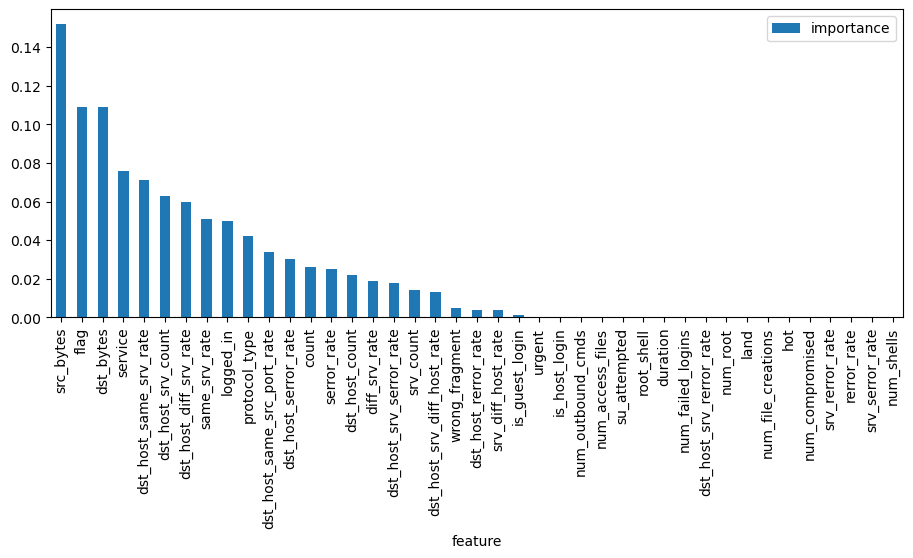

In [60]:
# Compute Feature Importance

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();

# fit random forest classifier on the training set
rfc.fit(X_train_transformed, y_train_transformed)

# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':X_train_transformed.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

In [61]:
importances.head(40)

,importance
feature,
src_bytes,0.152
flag,0.109
dst_bytes,0.109
service,0.076
dst_host_same_srv_rate,0.071
dst_host_srv_count,0.063
dst_host_diff_srv_rate,0.060
same_srv_rate,0.051
logged_in,0.050


In [62]:
importances_df     = importances.reset_index()
important_features = importances_df[importances_df['importance'] > 0.003]['feature'].to_list()
print(important_features, 'total: ', len(important_features))

['src_bytes', 'flag', 'dst_bytes', 'service', 'dst_host_same_srv_rate', 'dst_host_srv_count', 'dst_host_diff_srv_rate', 'same_srv_rate', 'logged_in', 'protocol_type', 'dst_host_same_src_port_rate', 'dst_host_serror_rate', 'count', 'serror_rate', 'dst_host_count', 'diff_srv_rate', 'dst_host_srv_serror_rate', 'srv_count', 'dst_host_srv_diff_host_rate', 'wrong_fragment', 'dst_host_rerror_rate', 'srv_diff_host_rate'] total:  22


## 4. Fit Classification Models using Transformed Datasets<a id='4'></a>

### 4.1 Import Models and Initialise the classfiers<a id='4.1'></a>

In [63]:
from sklearn.svm import SVC 
from sklearn.naive_bayes import BernoulliNB 
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [64]:
# Train Support Vector Classifier
SVC_Classifier = SVC()
SVC_Classifier.fit(X_train_transformed, y_train_transformed);

# Train Support Vector Classifier using 'Important Features'
SVC_Classifier_imp = SVC()
SVC_Classifier_imp.fit(X_train_transformed[important_features], y_train_transformed);

In [65]:
# Train KNeighborsClassifier Model
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(X_train_transformed, y_train_transformed); 

# Train KNeighborsClassifier Model using 'Important Features'
KNN_Classifier_imp = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier_imp.fit(X_train_transformed[important_features], y_train_transformed); 

In [66]:
# Train LogisticRegression Model

LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(X_train_transformed, y_train_transformed);

# Train LogisticRegression Model using 'Impotant Features'
LGR_Classifier_imp = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier_imp.fit(X_train_transformed[important_features], y_train_transformed);

In [67]:
# Train Gaussian Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train_transformed, y_train_transformed)

# Train Gaussian Naive Baye Model using 'Important Features'
BNB_Classifier_imp = BernoulliNB()
BNB_Classifier_imp.fit(X_train_transformed[important_features], y_train_transformed)

BernoulliNB()

In [68]:
# Train Decision Tree Model

DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(X_train_transformed, y_train_transformed)

DTC_Classifier_imp = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier_imp.fit(X_train_transformed[important_features], y_train_transformed)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### 4.2 Evaluate Models<a id='4.2'></a>

In [69]:
# Loop through each model and compute model performance

models = []
models.append(('Support Vector Classifier', SVC_Classifier))
models.append(('Naive Baye Classifier',     BNB_Classifier))
models.append(('Decision Tree Classifier',  DTC_Classifier))
models.append(('KNeighborsClassifier',      KNN_Classifier))
models.append(('LogisticRegression',        LGR_Classifier))

for row, model in models:
    
    #Perform Cross Validation using 'X_train'
    scores_train           = cross_val_score(model, X_train_transformed, y_train_transformed, cv=10)
    scores_valid           = cross_val_score(model, X_valid_transformed, y_valid_transformed, cv=10)
    
    #Compute Accuracy for 'X_train'
    accuracy_train   = metrics.accuracy_score(y_train_transformed, model.predict(X_train_transformed))
    accuracy_valid   = metrics.accuracy_score(y_valid_transformed,  model.predict(X_valid_transformed))
    
    #Compute Confusion Matrix for 'X_train' and 'X_test'
    confusion_matrix_train  = metrics.confusion_matrix(y_train_transformed, model.predict(X_train_transformed))
    confusion_matrix_valid  = metrics.confusion_matrix(y_valid_transformed, model.predict(X_valid_transformed))
    
    #Compute Classification Report for 'X_train' and 'X_test'
    classification_train    = metrics.classification_report(y_train_transformed, model.predict(X_train_transformed))
    classification_valid    = metrics.classification_report(y_valid_transformed, model.predict(X_valid_transformed))
    
    print()
    print('====================== {} Model Evaluation ======================='.format(row))
    print()
    print ("Cross Validation Mean Score for Train Dataset:" "\n", scores_train.mean())
    print ("Cross Validation Mean Score for Valid Dataset:" "\n", scores_valid.mean())
    print()
    print ("Model Accuracy for Train Dataset:" "\n", accuracy_train)
    print ("Model Accuracy for Valid Dataset:" "\n", accuracy_valid)
    print()
    print("Confusion matrix for Train Dataset:" "\n", confusion_matrix_train)
    print("Confusion matrix for Valid Dataset:" "\n", confusion_matrix_valid)
    print()
    print("Classification report for Train Dataset:" "\n", classification_train)
    print("Classification report for Valid Dataset:" "\n", classification_valid)
    print()


====================== Support Vector Classifier Model Evaluation =======================

Cross Validation Mean Score for Train Dataset:
 0.9806975954153374
Cross Validation Mean Score for Valid Dataset:
 0.9700341601186532

Model Accuracy for Train Dataset:
 0.9816900709571776
Model Accuracy for Valid Dataset:
 0.981543957134352

Confusion matrix for Train Dataset:
 [[10605   170]
 [  199  9179]]
Confusion matrix for Valid Dataset:
 [[2621   53]
 [  40 2325]]

Classification report for Train Dataset:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     10775
           1       0.98      0.98      0.98      9378

    accuracy                           0.98     20153
   macro avg       0.98      0.98      0.98     20153
weighted avg       0.98      0.98      0.98     20153

Classification report for Valid Dataset:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2674
           1

### 4.3 Evaluate Models using 'Important Features'<a id='4.3'></a>

In [70]:
# Loop through each model and compute model performance using 'Important Features'

models_important = []
models_important.append(('Support Vector Classifier Imp', SVC_Classifier_imp))
models_important.append(('Naive Baye Classifier Imp',     BNB_Classifier_imp))
models_important.append(('Decision Tree Classifier Imp',  DTC_Classifier_imp))
models_important.append(('KNeighborsClassifier Imp',      KNN_Classifier_imp))
models_important.append(('LogisticRegression Imp',        LGR_Classifier_imp))

for row, models_imp in models_important:
    scores_imp           = cross_val_score(models_imp, X_train_transformed[important_features], y_train_transformed, cv=10)
    accuracy_imp         = metrics.accuracy_score(y_train_transformed, models_imp.predict(X_train_transformed[important_features]))
    confusion_matrix_imp = metrics.confusion_matrix(y_train_transformed, models_imp.predict(X_train_transformed[important_features]))
    classification_imp   = metrics.classification_report(y_train_transformed, models_imp.predict(X_train_transformed[important_features]))
    print()
    print('====================== {} Model Evaluation Using Important Features ======================='.format(row))
    print()
    print ("Cross Validation Mean Score:" "\n", scores_imp.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy_imp)
    print()
    print("Confusion matrix:" "\n", confusion_matrix_imp)
    print()
    print("Classification report:" "\n", classification_imp) 
    print()


====================== Support Vector Classifier Imp Model Evaluation Using Important Features =======================

Cross Validation Mean Score:
 0.9817892591279687

Model Accuracy:
 0.9835756463057609

Confusion matrix:
 [[10633   142]
 [  189  9189]]

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98     10775
           1       0.98      0.98      0.98      9378

    accuracy                           0.98     20153
   macro avg       0.98      0.98      0.98     20153
weighted avg       0.98      0.98      0.98     20153



====================== Naive Baye Classifier Imp Model Evaluation Using Important Features =======================

Cross Validation Mean Score:
 0.8949531046910078

Model Accuracy:
 0.8949536049223441

Confusion matrix:
 [[10414   361]
 [ 1756  7622]]

Classification report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91     10775
 

## 5 Predict 'Network Intrusion' Using Unseen 'Test' Dataset<a id='5'></a>

### 5.1 Predict using RandomForest Classifier<a id='5.1'></a>

In [71]:
from sklearn.ensemble import RandomForestClassifier

# Evaluate the model performance using KFold CV
kf = KFold(5, shuffle=True, random_state=42)
models       = []   # Trained model record
fi           = []   # Feature importance record
val_metrics  = []   # Evaluation metrics record
fold         = 0
y_test_preds = []

for train_idx, val_idx in kf.split(X_train_transformed[important_features]):
    print(f"=====Evaluation of fold{fold} starts=====")
    # Prepare the training and validation sets
    X_train_, X_val = X_train_transformed[important_features].iloc[train_idx, :], X_train_transformed[important_features].iloc[val_idx, :]
    y_train_, y_val = y_train_transformed[train_idx], y_train_transformed[val_idx]
    
    # Train the classifier (rfc)
    rfc = RandomForestClassifier(n_estimators=500)
    rfc.fit(X_train_, y_train_)
    models.append(rfc)    # Record the trained model
    fi.append(rfc.feature_importances_)   # Record the feature importance
    
    # Predict and evaluate the performance
    y_val_pred = rfc.predict(X_val)
    p_r_f1_mac = list(precision_recall_fscore_support(y_val, y_val_pred, average='macro')[:3])
    p_r_f1_mic = list(precision_recall_fscore_support(y_val, y_val_pred, average='micro')[:3])
    p_r_f1_wei = list(precision_recall_fscore_support(y_val, y_val_pred, average='weighted')[:3])
    val_metrics.append([p_r_f1_mac, p_r_f1_mic, p_r_f1_wei])   # Concatenate the evaluation metrics and record
    print(f"=====Classification Report=====\n{classification_report(y_val, y_val_pred)}")
    
    # Predict 'X_test' - Unseen data
    y_test_pred = rfc.predict(X_test_transformed[important_features])
    y_test_preds.append(y_test_pred)
    
    print(f"=====Evaluation of fold{fold} finishes=====\n")
    fold += 1

=====Evaluation of fold0 starts=====
=====Classification Report=====
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2159
           1       1.00      0.99      1.00      1872

    accuracy                           1.00      4031
   macro avg       1.00      1.00      1.00      4031
weighted avg       1.00      1.00      1.00      4031

=====Evaluation of fold0 finishes=====

=====Evaluation of fold1 starts=====
=====Classification Report=====
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2137
           1       1.00      0.99      0.99      1894

    accuracy                           1.00      4031
   macro avg       1.00      1.00      1.00      4031
weighted avg       1.00      1.00      1.00      4031

=====Evaluation of fold1 finishes=====

=====Evaluation of fold2 starts=====
=====Classification Report=====
              precision    recall  f1-score   support

    

### 5.2 Evaluate Performance Metrics<a id='5.2'></a>

In [72]:
# Summarize the avarage performance in KFold CV

avg_metrics = np.mean(val_metrics, axis=0)
print("=====Average evaluatin metrics over 5 folds=====")
for i, method in enumerate(['Macro', 'Micro', 'Weighted']):
    print(f"=====Metrics {method}=====")
    print(f"Precision = {avg_metrics[i][0]} | Recall = {avg_metrics[i][1]} | F1-score = {avg_metrics[i][2]}")

=====Average evaluatin metrics over 5 folds=====
=====Metrics Macro=====
Precision = 0.9959095720929468 | Recall = 0.9957160736141988 | F1-score = 0.9958105832244712
=====Metrics Micro=====
Precision = 0.9958319057084273 | Recall = 0.9958319057084273 | F1-score = 0.9958319057084273
=====Metrics Weighted=====
Precision = 0.995835568256447 | Recall = 0.9958319057084273 | F1-score = 0.9958315184391836


### 5.3 Create Final Output Dataset by Combiining Prediction<a id='5.3'></a>

In [73]:
y_test_preds

[array([1, 1, 0, ..., 0, 0, 1], dtype=int64),
 array([1, 1, 0, ..., 0, 0, 1], dtype=int64),
 array([1, 1, 0, ..., 0, 0, 1], dtype=int64),
 array([1, 1, 0, ..., 0, 0, 1], dtype=int64),
 array([1, 1, 0, ..., 0, 0, 1], dtype=int64)]

In [74]:
# Take majority voting

y_test_pred_voted = np.where(np.mean(y_test_preds, axis=0) >= 0.5, 1, 0)

#Create final X_test Dataframe by combining y_predict

y_test_pred_voted_df = pd.DataFrame({'Predicted Class':y_test_pred_voted})

X_test_with_predicted_df = pd.concat([X_test, y_test_pred_voted_df], axis=1)
X_test_with_predicted_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Predicted Class
0,0,0.837473,0.211764,0.170777,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,1
1,0,0.837473,0.211764,0.170777,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,1
2,2,0.837473,0.037748,0.659821,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,0
3,0,0.046265,0.011622,0.659821,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,1
4,1,0.837473,0.072126,0.034289,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,1
